In [1]:
import networkx as nx
import numpy as np

In [2]:
def cliqueable(f):
    def w(*args, c=1, full=True, **kwargs):
        g_b = f(*args, **kwargs)
        g = nx.Graph()
        
        for n in g_b.nodes():
            for i in range(c):
                for j in range(i, c):
                    g.add_edge(n * c + i, n * c + j)
                
        for v, u in g_b.edges():
            if full:
                for i in range(c):
                    for j in range(c):
                        g.add_edge(v * c + i, u * c + j)
            else:
                for i in range(c):
                    g.add_edge(v * c + i, u * c + i)
        
        return g
        
    return w

@cliqueable
def graph1():
    g = nx.Graph()
    
    nx.add_cycle(g, range(4))
    # g.add_edge(3, 4)
    
    return g

g1 = graph1(c=1)
g3 = graph1(c=3)

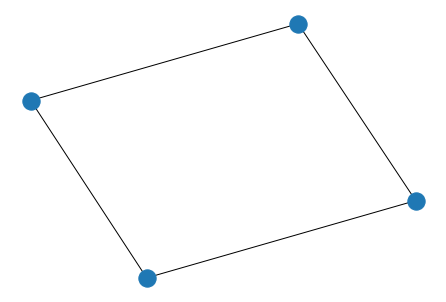

In [3]:
nx.draw(g1)

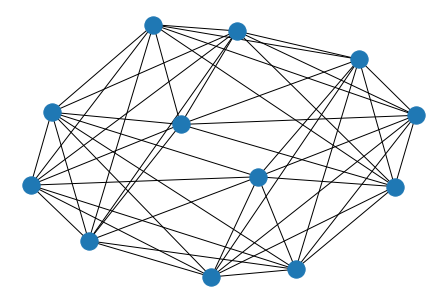

In [4]:
nx.draw(g3)

In [5]:
np.around(nx.linalg.spectrum.laplacian_spectrum(g1), 3)

array([-0.,  2.,  2.,  4.])

In [6]:
np.around(nx.linalg.spectrum.laplacian_spectrum(g3), 3)

array([-0.,  6.,  6.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 12.])

In [7]:
np.around(nx.linalg.spectrum.normalized_laplacian_spectrum(g1), 3)

array([0.   , 0.667, 0.667, 1.333])

In [8]:
np.around(nx.linalg.spectrum.normalized_laplacian_spectrum(g3), 3)

array([-0.   ,  0.667,  0.667,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.333])

In [9]:
L = nx.laplacian_matrix(g1)

l, u = np.linalg.eig(L.A)

print("Laplacian:")
print(np.around(L.A, 3))
print("Eigenvalues:", np.around(l, 3))
print("Eigenvectors:")
print(np.around(u, 3))

Laplacian:
[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]
Eigenvalues: [-0.  2.  4.  2.]
Eigenvectors:
[[ 0.5    0.707 -0.5    0.   ]
 [ 0.5   -0.     0.5   -0.707]
 [ 0.5   -0.707 -0.5    0.   ]
 [ 0.5    0.     0.5    0.707]]


In [10]:
L = nx.normalized_laplacian_matrix(g1)

l, u = np.linalg.eig(L.A)

print("Normalized Laplacian:")
print(np.around(L.A, 3))
print("Normalized Eigenvalues:", np.around(l, 3))
print("Normalized Eigenvectors:")
print(np.around(u, 3))

Normalized Laplacian:
[[ 0.667 -0.333  0.    -0.333]
 [-0.333  0.667 -0.333  0.   ]
 [ 0.    -0.333  0.667 -0.333]
 [-0.333  0.    -0.333  0.667]]
Normalized Eigenvalues: [0.    0.667 1.333 0.667]
Normalized Eigenvectors:
[[ 0.5    0.707 -0.5   -0.   ]
 [ 0.5    0.     0.5   -0.707]
 [ 0.5   -0.707 -0.5    0.   ]
 [ 0.5    0.     0.5    0.707]]
